In [1]:
!pip install -q kaggle

In [2]:
!mkdir -p ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [4]:
! kaggle datasets download -d mlg-ulb/creditcardfraud

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [5]:
!unzip /content/creditcardfraud.zip

unzip:  cannot find or open /content/creditcardfraud.zip, /content/creditcardfraud.zip.zip or /content/creditcardfraud.zip.ZIP.


In [6]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay

# Load and Prepare The Data

In [7]:
# take the path of the file
data_csv_file = '/content/creditcard.csv'
# read the data from the csv file and convert it into a dataframe
data = pd.read_csv(data_csv_file)

In [8]:
# display the first 5 rows from the dataframe
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [9]:
# check if there any dulicated rows
data.duplicated().sum()

53

# Exploratory Data Analysis

In [10]:
# print the number of rows and columns in the dataframe
print('The data contains %d rows and %d columns (attributes)' %(data.shape[0], data.shape[1]))

The data contains 15936 rows and 31 columns (attributes)


In [11]:
# print information about the data
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,...,15936.000000,15936.000000,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000
mean,12121.217871,-0.254293,0.277171,0.803852,0.301343,-0.130469,0.112551,-0.150434,0.000687,0.860838,...,-0.061754,-0.162257,-0.036524,0.011509,0.117477,0.037900,0.015402,0.006161,66.390222,0.004581
std,8982.283843,1.843083,1.491497,1.704252,1.491713,1.382485,1.329406,1.321898,1.303509,1.253988,...,0.855525,0.624614,0.543296,0.587200,0.436867,0.546881,0.401168,0.253739,189.355098,0.067531
min,0.000000,-28.344757,-40.978852,-27.368650,-5.172595,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,...,-11.468435,-8.593642,-26.751119,-2.512377,-7.495741,-1.338556,-8.567638,-3.575312,0.000000,0.000000
25%,3633.500000,-0.970824,-0.286548,0.371671,-0.621215,-0.712525,-0.639011,-0.600811,-0.179179,0.067089,...,-0.268829,-0.559341,-0.173003,-0.336475,-0.140144,-0.355523,-0.073563,-0.013205,5.490000,0.000000
50%,10980.000000,-0.318478,0.247437,0.941822,0.231366,-0.186241,-0.160812,-0.084696,0.017471,0.851878,...,-0.127164,-0.126343,-0.044512,0.060331,0.155636,-0.027574,0.001209,0.017630,15.950000,0.000000
75%,20621.500000,1.161949,0.884689,1.575960,1.180124,0.352221,0.501828,0.440006,0.266216,1.567643,...,0.027233,0.229727,0.072765,0.393416,0.393032,0.359173,0.100782,0.076575,53.890000,0.000000
max,27371.000000,1.960497,14.601998,4.101716,11.927512,34.099309,21.393069,34.303177,17.052566,10.392889,...,22.614889,4.534454,13.876221,3.695503,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


In [12]:
# print the data information
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15936 entries, 0 to 15935
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    15936 non-null  int64  
 1   V1      15936 non-null  float64
 2   V2      15936 non-null  float64
 3   V3      15936 non-null  float64
 4   V4      15936 non-null  float64
 5   V5      15936 non-null  float64
 6   V6      15936 non-null  float64
 7   V7      15936 non-null  float64
 8   V8      15936 non-null  float64
 9   V9      15936 non-null  float64
 10  V10     15936 non-null  float64
 11  V11     15936 non-null  float64
 12  V12     15936 non-null  float64
 13  V13     15936 non-null  float64
 14  V14     15936 non-null  float64
 15  V15     15936 non-null  float64
 16  V16     15936 non-null  float64
 17  V17     15936 non-null  float64
 18  V18     15936 non-null  float64
 19  V19     15936 non-null  float64
 20  V20     15936 non-null  float64
 21  V21     15936 non-null  float64
 22

In [13]:
# print column names
col_names = data.columns
print(col_names)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [14]:
# print the number of the fraud and valid transactions
classes, counts = np.unique(data["Class"], return_counts=True)
print(f'Fraud Cases: {counts[0]}')
print(f'Valid Transactions: {counts[1]}')

Fraud Cases: 15862
Valid Transactions: 73


# Charts

ValueError: 'label' must be of length 'x'

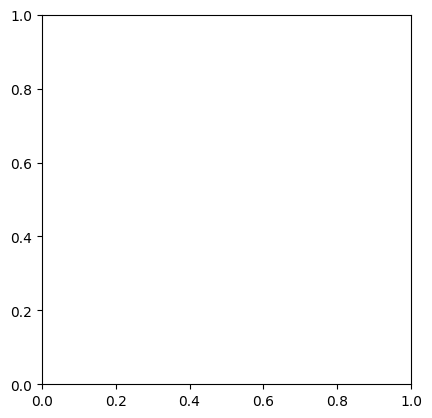

In [15]:
# plot a pie chart
Labels = 'valid: '+ str(counts[0]), 'fraud: '+ str(counts[1])
fig, ax = plt.subplots()
ax.pie(counts, labels=Labels, autopct='%1.1f%%')

In [ ]:
correlation_matrix = data.corr()

plt.figure(figsize=(8, 4))
sns.barplot(x=correlation_matrix.index, y=correlation_matrix['Class'], palette='coolwarm')
plt.xticks(rotation=90)
plt.title('correlation with class')
plt.xlabel('features')
plt.ylabel('correlation')
plt.show()

# Data Preprocessing

In [ ]:
# extract the features from the data frame
columns = data.columns
features_names = columns[columns != 'Class']
features = data[features_names]
target = data['Class']

In [ ]:
# print the shape of the features and target
print('the shape of the featuers: ', features.shape )
print('the shape of the target  : ', target.shape )

In [ ]:
# split the data and handel the imbalance data
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state=50, stratify=target)

In [ ]:
# print the percentage of the valid transactions in the training set
Y_train.sum()/Y_train.count()

In [ ]:
# print the percentage of the valid transactions in the training set
Y_test.sum()/Y_test.count()

In [ ]:
# initialising the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Model (Logistic Regression)

In [ ]:
# initialize the Logistic Regression model
model = LogisticRegression(random_state=50)

In [ ]:
# fit (train) the model
model.fit(X_train_scaled, Y_train)

In [ ]:
# get the prediction of the trained model
predictions = model.predict(X_test_scaled)

# Evaluate the Model (Logistic Regression)

In [ ]:
# evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(Y_test, predictions))

In [ ]:
# find the confusion matrix
cm = confusion_matrix(Y_test, predictions)
# display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=Labels)

fig, ax = plt.subplots(figsize=(6, 6))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

In [ ]:
print('                      classification_report                      ')
print(classification_report(Y_test, predictions))

In [ ]:
# Calculate the metrics
accuracy = accuracy_score(Y_test, predictions)
precision = precision_score(Y_test, predictions)
recall = recall_score(Y_test, predictions)
f1_score = f1_score(Y_test, predictions)

In [ ]:
# convert the scores into a dataframe and print it
Report=pd.DataFrame(columns=['Model','Accuracy', 'Precision', 'Recall', 'F1-Score'])
# Create a DataFrame
Report=Report._append({'Model':'Logistic Regression','Accuracy':accuracy, 'Precision':precision, 'Recall':recall, 'F1-Score':f1_score}, ignore_index=True)
Report

# Build the Model (Random Forest)

In [ ]:
# initialize the Random Forest Classifier
rf_model = RandomForestClassifier()

In [ ]:
# fit (train) the model
rf_model.fit(X_train_scaled, Y_train)

In [ ]:
# get the prediction of the trained model
rf_predictions = rf_model.predict(X_test_scaled)

# Evaluate the Model (Random Forest)

In [ ]:
# evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(Y_test, rf_predictions))

In [ ]:
# find the confusion matrix
cm2 = confusion_matrix(Y_test, rf_predictions)
# display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm2,
                              display_labels=Labels)

fig, ax = plt.subplots(figsize=(6, 6))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

In [ ]:
print('                      classification_report                      ')
print(classification_report(Y_test, rf_predictions))

In [ ]:
# Calculate the metrics
rf_accuracy = accuracy_score(Y_test, rf_predictions)
rf_precision = precision_score(Y_test, rf_predictions)
rf_recall = recall_score(Y_test, rf_predictions)
rf_f1_score = f1_score(Y_test, rf_predictions)

In [ ]:
Report=Report._append({'Model':'Random Forest','Accuracy':rf_accuracy, 'Precision':rf_precision, 'Recall':rf_recall, 'F1-Score':rf_f1_score}, ignore_index=True)
Report